In [1]:
import os
import PyPDF2
import pandas as pd
import matplotlib.pyplot as plt

# Updated folder containing PDFs with date in the folder name
folder_path = './CDL'

# Words to count
words_to_count = ['crise', 'inégalité']

# Function to extract text from a PDF
def extract_text_from_pdf(pdf_file_path):
    pdf_text = ""
    with open(pdf_file_path, 'rb') as file:
        reader = PyPDF2.PdfReader(file)
        for page in reader.pages:
            pdf_text += page.extract_text()
    return pdf_text

# Initialize a list to hold DataFrames for each PDF
dfs = []

# Iterate over all PDF files in the folder
for filename in os.listdir(folder_path):
    if filename.endswith('.pdf'):
        # Construct the full file path
        pdf_file_path = os.path.join(folder_path, filename)

        # Extract year from the filename (first 4 characters)
        year = filename[:4]
        
        # Extract text and convert to lower case
        text = extract_text_from_pdf(pdf_file_path).lower()

        # Count occurrences of each word
        word_counts = {word: text.count(word) for word in words_to_count}

        # Convert counts to DataFrame
        df = pd.DataFrame(list(word_counts.items()), columns=['Word', 'Count'])
        df['File'] = filename  # Add a column for the filename
        df['Year'] = year  # Add a column for the extracted year
        
        # Append to the list of DataFrames
        dfs.append(df)

        # Display the DataFrame for the current PDF
        print(f"Word counts for {filename}:\n{df.to_string(index=False)}\n")

# Combine all DataFrames into a single DataFrame
combined_df = pd.concat(dfs)

# Convert 'Year' to integer for proper sorting
combined_df['Year'] = combined_df['Year'].astype(int)


Word counts for 1990.pdf:
     Word  Count     File Year
    crise     34 1990.pdf 1990
inégalité      1 1990.pdf 1990



<Figure size 1200x700 with 0 Axes>

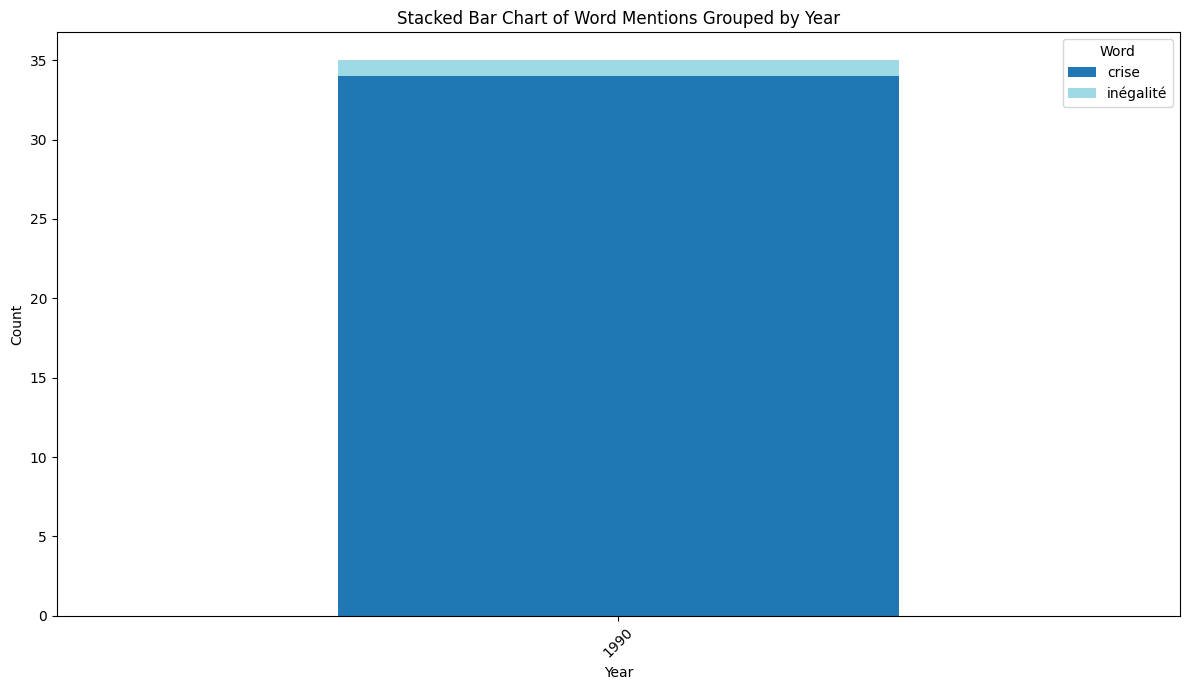

In [2]:
import seaborn as sns

# Aggregate data by Year and Word
yearly_counts = combined_df.groupby(['Year', 'Word']).sum().reset_index()

# Create the pivot table with 'Year' as the index
pivot_df_year = yearly_counts.pivot(index='Year', columns='Word', values='Count').fillna(0)

plt.figure(figsize=(12, 7))

# Plot the stacked bar chart with 'Year' on the x-axis
pivot_df_year.plot(kind='bar', stacked=True, figsize=(12, 7), colormap='tab20')

plt.title('Stacked Bar Chart of Word Mentions Grouped by Year')
plt.ylabel('Count')
plt.xlabel('Year')
plt.xticks(rotation=45)
plt.legend(title='Word')
plt.tight_layout()
plt.show()


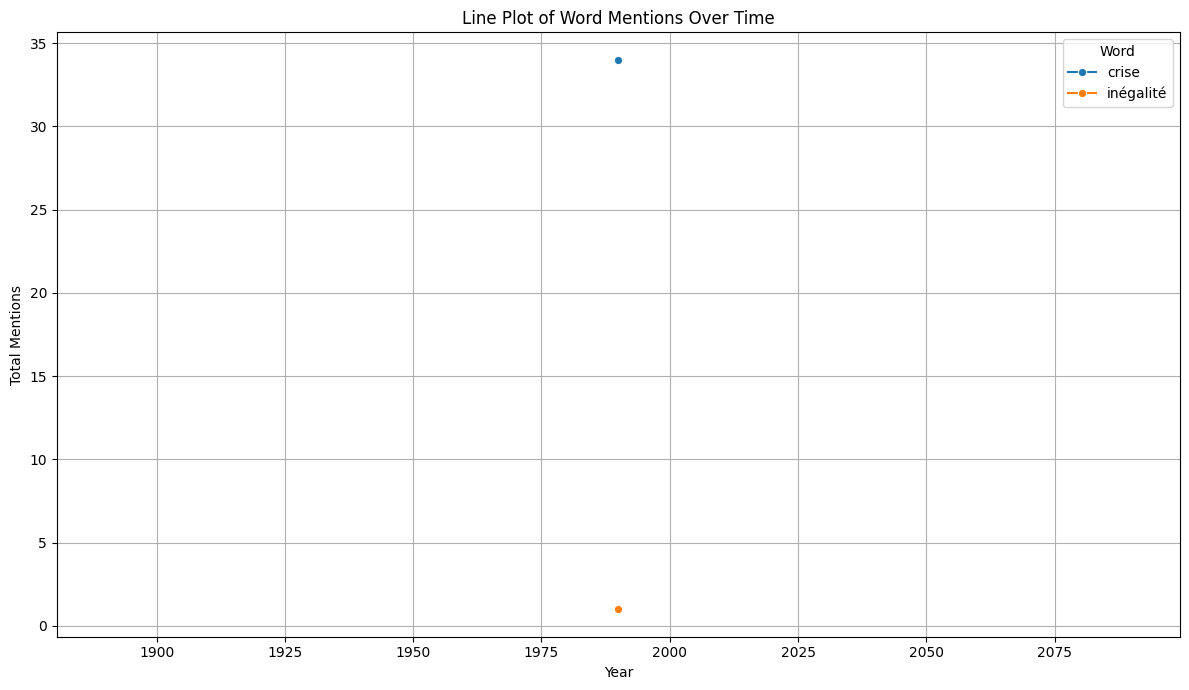

In [3]:
plt.figure(figsize=(12, 7))

# Use the yearly_counts DataFrame from the previous snippet
# Line plot of total word mentions over time
sns.lineplot(data=yearly_counts, x='Year', y='Count', hue='Word', marker='o')

plt.title('Line Plot of Word Mentions Over Time')
plt.xlabel('Year')
plt.ylabel('Total Mentions')
plt.grid(True)
plt.legend(title='Word')
plt.tight_layout()
plt.show()


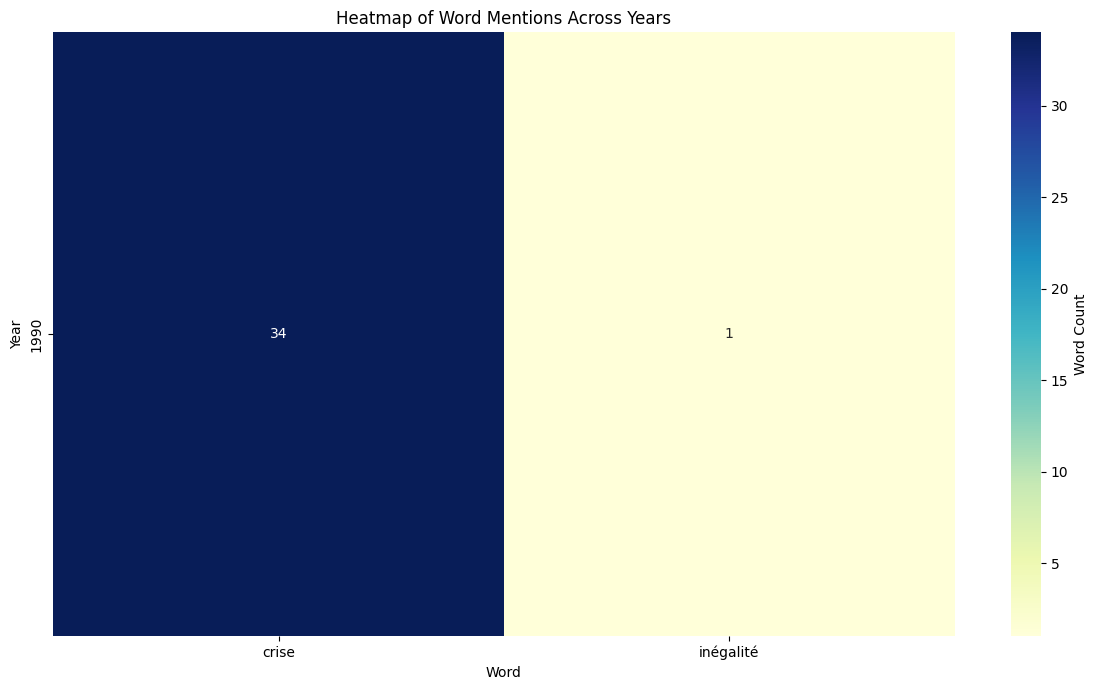

In [4]:
plt.figure(figsize=(12, 7))

# Use the pivot table created for the bar plot
# Heatmap to visualize word mentions across years
sns.heatmap(pivot_df_year, annot=True, fmt=".0f", cmap='YlGnBu', cbar_kws={'label': 'Word Count'})

plt.title('Heatmap of Word Mentions Across Years')
plt.ylabel('Year')
plt.xlabel('Word')
plt.tight_layout()
plt.show()


<Figure size 1200x700 with 0 Axes>

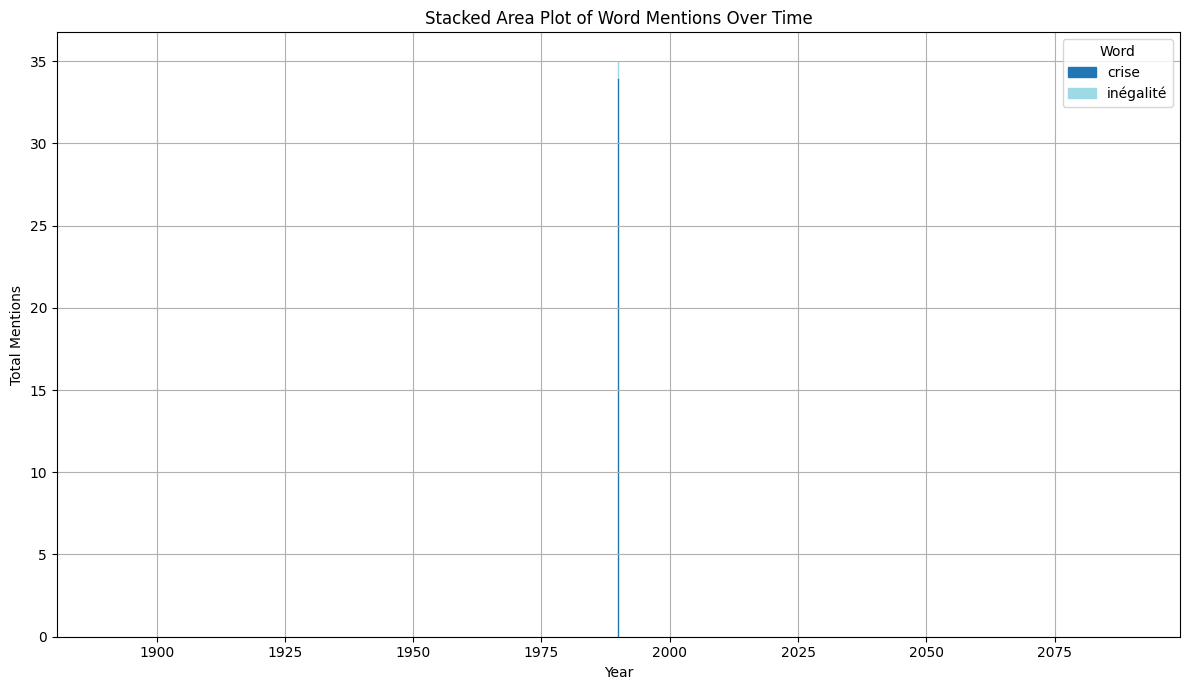

In [5]:
plt.figure(figsize=(12, 7))

# Prepare data for stacked area plot
pivot_df_year_sorted = pivot_df_year.sort_index()

# Plot the stacked area chart
pivot_df_year_sorted.plot(kind='area', stacked=True, figsize=(12, 7), colormap='tab20')

plt.title('Stacked Area Plot of Word Mentions Over Time')
plt.ylabel('Total Mentions')
plt.xlabel('Year')
plt.xticks(rotation=0)
plt.grid(True)
plt.legend(title='Word')
plt.tight_layout()
plt.show()


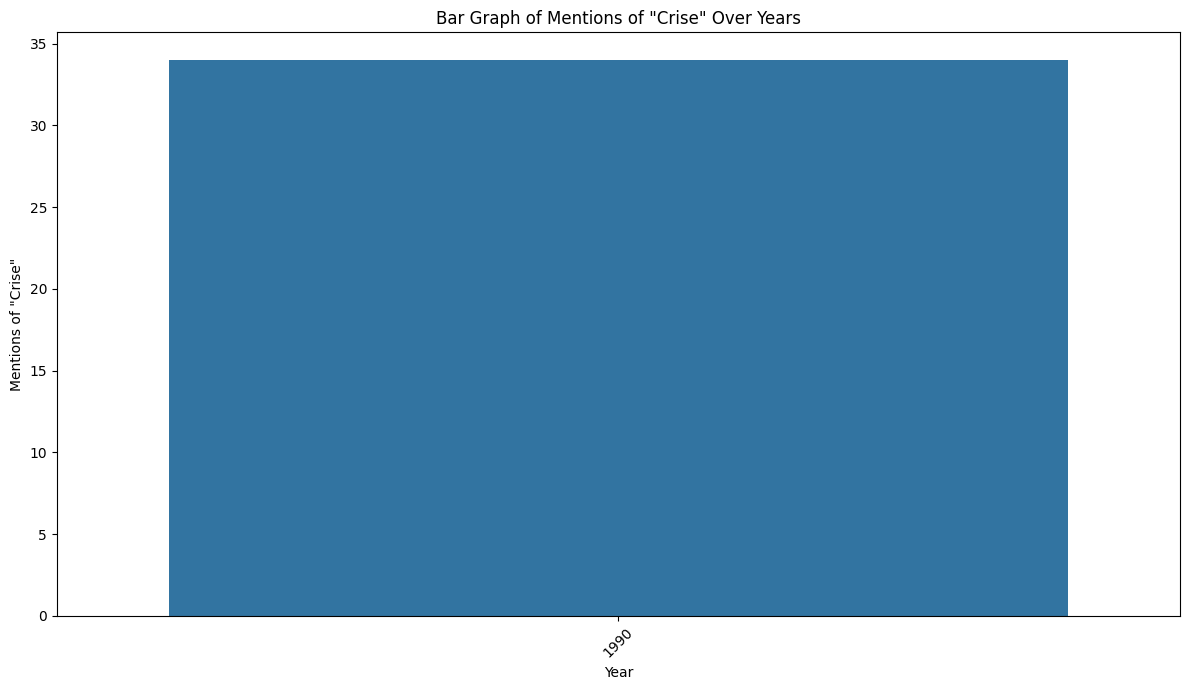

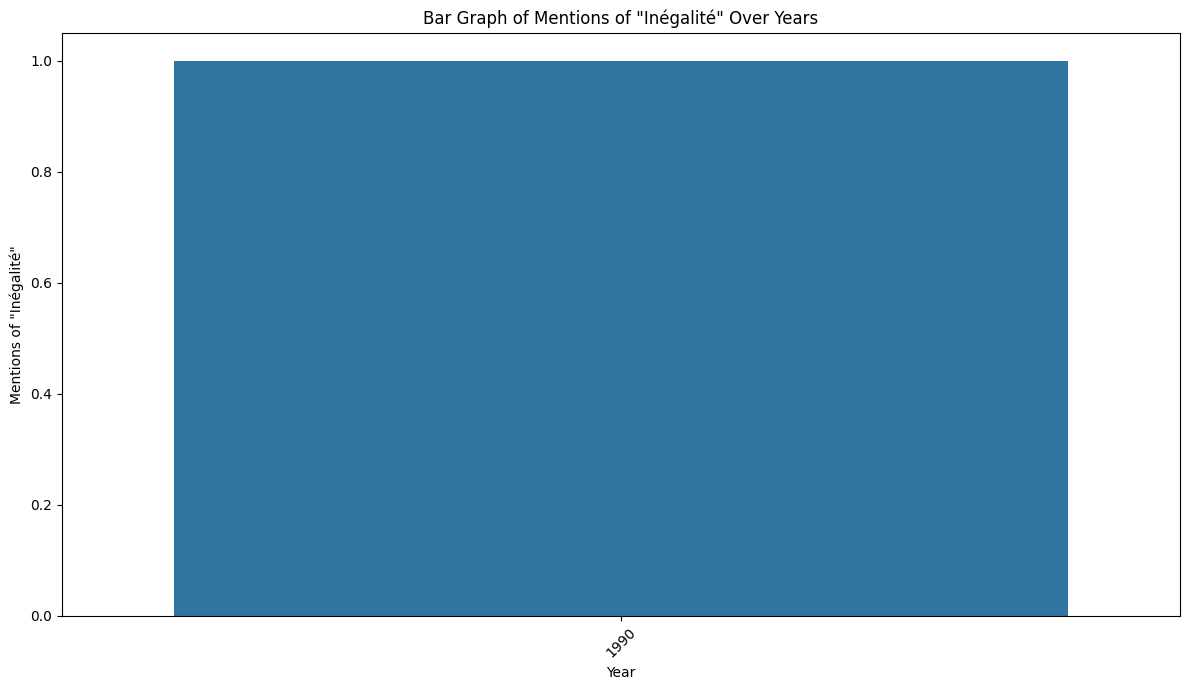

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of words to visualize separately
words_to_count = ['crise', 'inégalité']

# Loop through each word and create a bar graph
for word in words_to_count:
    plt.figure(figsize=(12, 7))

    # Filter the data for the current word
    word_data = yearly_counts[yearly_counts['Word'] == word]
    
    # Bar plot for the current word
    sns.barplot(data=word_data, x='Year', y='Count', color='tab:blue')

    plt.title(f'Bar Graph of Mentions of "{word.capitalize()}" Over Years')
    plt.xlabel('Year')
    plt.ylabel(f'Mentions of "{word.capitalize()}"')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
